In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('retail_sales_data.csv') 

In [7]:
df = pd.DataFrame(df)

In [9]:
df.drop('Revenue',axis=1,inplace=True)

In [11]:
df['Revenue'] = df['Quantity'] * df['Unit_Price']

In [13]:
threshold = df['Revenue'].median()
threshold

4000.0

In [15]:
def classify_transaction(revenue,threshold):
    if revenue > threshold:
        return 'High Value'
    else: 
        return 'Standard'

transaction_types = [classify_transaction(rev,threshold) for rev in df['Revenue']]
df['Transaction_Type'] = transaction_types
df

,Date,Store,Product,Quantity,Unit_Price,Revenue,Transaction_Type
0,2023-05-04,Lagos Central,Smartphone,17,500,8500,High Value
1,2023-05-09,Abuja Hub,Smartphone,30,100,3000,Standard
2,2023-05-08,Lagos Central,Laptop,15,500,7500,High Value
3,2023-05-24,Abuja Hub,Laptop,6,300,1800,Standard
4,2023-05-04,Lagos Central,Camera,24,100,2400,Standard
...,...,...,...,...,...,...,...
109,2023-05-04,Lagos Central,Tablet,23,500,11500,High Value
110,2023-05-22,Lagos Central,Tablet,27,200,5400,High Value
111,2023-05-29,Abuja Hub,Tablet,21,200,4200,High Value
112,2023-05-18,Lagos Central,Headphones,8,300,2400,Standard


In [17]:
df[['Product','Revenue','Store']]

,Product,Revenue,Store
0,Smartphone,8500,Lagos Central
1,Smartphone,3000,Abuja Hub
2,Laptop,7500,Lagos Central
3,Laptop,1800,Abuja Hub
4,Camera,2400,Lagos Central
...,...,...,...
109,Tablet,11500,Lagos Central
110,Tablet,5400,Lagos Central
111,Tablet,4200,Abuja Hub
112,Headphones,2400,Lagos Central


In [19]:
def discount_rate(transaction_type):
    if transaction_type == 'High Value':
        return 10
    else :
        return 5

df['Discount_Percent'] = [discount_rate(tt) for tt in df['Transaction_Type']]
df

,Date,Store,Product,Quantity,Unit_Price,Revenue,Transaction_Type,Discount_Percent
0,2023-05-04,Lagos Central,Smartphone,17,500,8500,High Value,10
1,2023-05-09,Abuja Hub,Smartphone,30,100,3000,Standard,5
2,2023-05-08,Lagos Central,Laptop,15,500,7500,High Value,10
3,2023-05-24,Abuja Hub,Laptop,6,300,1800,Standard,5
4,2023-05-04,Lagos Central,Camera,24,100,2400,Standard,5
...,...,...,...,...,...,...,...,...
109,2023-05-04,Lagos Central,Tablet,23,500,11500,High Value,10
110,2023-05-22,Lagos Central,Tablet,27,200,5400,High Value,10
111,2023-05-29,Abuja Hub,Tablet,21,200,4200,High Value,10
112,2023-05-18,Lagos Central,Headphones,8,300,2400,Standard,5


In [21]:
store_counts = df['Store'].value_counts()
print('Store Transaction Counts:')
print(store_counts)
df_sorted = df.sort_values(by='Revenue',ascending=False)
print('DataFrame Sorted by Revenue:')
print(df_sorted)

Store Transaction Counts:
Store
Lagos Central    60
Abuja Hub        54
Name: count, dtype: int64
DataFrame Sorted by Revenue:
           Date          Store     Product  Quantity  Unit_Price  Revenue  \
38   2023-05-15      Abuja Hub      Tablet        28         500    14000   
33   2023-05-12  Lagos Central  Smartwatch        27         500    13500   
47   2023-05-22      Abuja Hub  Smartwatch        26         500    13000   
86   2023-05-15  Lagos Central  Headphones        25         500    12500   
109  2023-05-04  Lagos Central      Tablet        23         500    11500   
..          ...            ...         ...       ...         ...      ...   
37   2023-05-24      Abuja Hub      Laptop         1         400      400   
62   2023-05-21      Abuja Hub  Smartwatch         1         300      300   
52   2023-05-13      Abuja Hub      Laptop         1         200      200   
103  2023-05-03  Lagos Central      Laptop         1         100      100   
41   2023-05-18  Lagos Cen

## Pivot Tables 

In [23]:
pivot_table_df  = df.pivot_table(index="Date", columns="Store", values="Revenue", aggfunc='sum')
print("Pivot Table using pivot():")
print(pivot_table_df )

Pivot Table using pivot():
Store       Abuja Hub  Lagos Central
Date                                
2023-05-01     4000.0         3600.0
2023-05-02    14200.0         7200.0
2023-05-03    16400.0        21300.0
2023-05-04    12100.0        26900.0
2023-05-05      800.0         5300.0
2023-05-06    10800.0         2600.0
2023-05-07        NaN        17800.0
2023-05-08    21700.0        14600.0
2023-05-09    17600.0        13700.0
2023-05-10        NaN         3600.0
2023-05-11     8500.0         2700.0
2023-05-12    11400.0        28300.0
2023-05-13     2100.0         1000.0
2023-05-14     9200.0            NaN
2023-05-15    15400.0        21300.0
2023-05-16     4200.0            NaN
2023-05-17    15500.0            NaN
2023-05-18    10400.0         7000.0
2023-05-19        NaN         6400.0
2023-05-20        NaN        27400.0
2023-05-21      300.0        22400.0
2023-05-22    13000.0        14500.0
2023-05-23     6500.0         1300.0
2023-05-24     9000.0         1900.0
2023-05-25 

## Data Visualization

### Revenue Trends Over Time For Each Store.

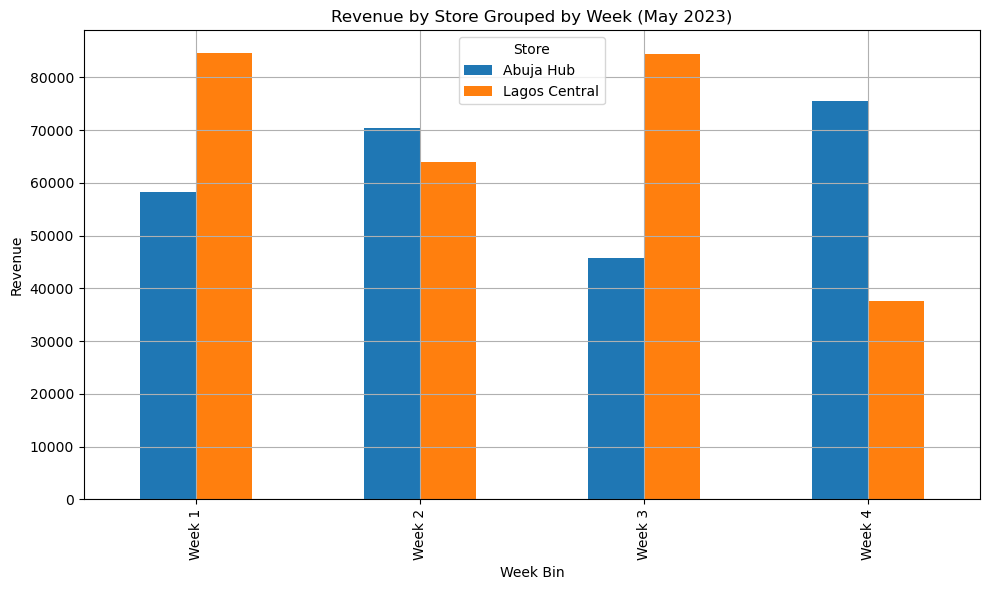

In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df["Day_Bin"] = pd.cut(df["Date"].dt.day, bins=[0, 7, 14, 21, 31], labels=["Week 1", "Week 2", "Week 3", "Week 4"])

binned_revenue = df.pivot_table(index="Day_Bin", columns="Store", values="Revenue", aggfunc="sum", observed=False)

binned_revenue.plot(kind="bar", figsize=(10, 6))
plt.title("Revenue by Store Grouped by Week (May 2023)")
plt.xlabel("Week Bin")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.savefig("lineplot_revenue_trend.png")
plt.show()

In [43]:
df

,Date,Store,Product,Quantity,Unit_Price,Revenue,Transaction_Type,Discount_Percent,Day_Bin
0,2023-05-04,Lagos Central,Smartphone,17,500,8500,High Value,10,Week 1
1,2023-05-09,Abuja Hub,Smartphone,30,100,3000,Standard,5,Week 2
2,2023-05-08,Lagos Central,Laptop,15,500,7500,High Value,10,Week 2
3,2023-05-24,Abuja Hub,Laptop,6,300,1800,Standard,5,Week 4
4,2023-05-04,Lagos Central,Camera,24,100,2400,Standard,5,Week 1
...,...,...,...,...,...,...,...,...,...
109,2023-05-04,Lagos Central,Tablet,23,500,11500,High Value,10,Week 1
110,2023-05-22,Lagos Central,Tablet,27,200,5400,High Value,10,Week 4
111,2023-05-29,Abuja Hub,Tablet,21,200,4200,High Value,10,Week 4
112,2023-05-18,Lagos Central,Headphones,8,300,2400,Standard,5,Week 3


### Bar Chart To Compare Total Revenue Per Store

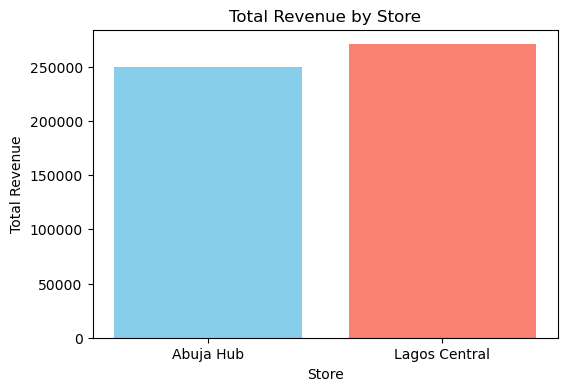

In [27]:
total_revenue = df.groupby('Store')['Revenue'].sum()
plt.figure(figsize=(6,4)) 
plt.bar(total_revenue.index,total_revenue.values, color=['skyblue','salmon'])
plt.title('Total Revenue by Store')
plt.xlabel('Store')
plt.ylabel('Total Revenue')
plt.savefig('barplot_total_revenue.png')
plt.show()

### Distribution Of Transactions By Type

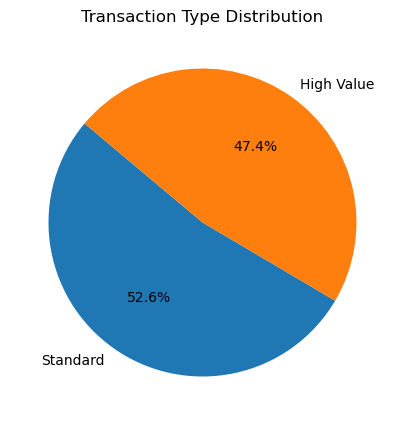

In [29]:
transaction_distribution = df["Transaction_Type"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(transaction_distribution, labels=transaction_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title("Transaction Type Distribution")
plt.savefig("piechart_transaction_distribution.png")  # Save the plot
plt.show()